# Part II - (MICROSOFT MOVIE RECOMMENDATION)

## by (Anastacia Nyamoita)




## Investigation Overview


>Exploring and investigating past movie data sets and
checking what types of films are currently doing the best at the
box office.
>Translating those findings into actionable insights and give
recommendations that the head of Microsoft's new movie studio can use to help decide what type of films to create.

>The following were the analyzation questions.

>These variables are my point of analysis. Analysis questions like;

         >ANALYSIS 1.Checking the most produced genres

         >ANALYSIS 2:checking if the most produced genres are the most profitable genres

         >ANALYSIS 3:checking if more production bugdet translates to higher profit

         >ANALYSIS 4: checking for most expensive genres to produce

         >ANALYSIS 5:Checking if the runtime can affect the profit

         >ANALYSIS 6: Checking whether movie rating affect profit

         >ANALYSIS 7:Checking if time of the year movie is produced affects profit|
## Dataset Overview

>This dataset (the final one) is a combination of mutiple datasets that have been combined to form a major data set that has been used to perform analyzations, to come up with visualizations and in the end, make useful insights for microsoft .

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
def wrangle(filename):
    df = pd.read_csv(filename)
    
    return df

In [4]:
#calling the funcyion
gross_df=wrangle("bom.movie_gross.csv.gz")
budget_df=wrangle('tn.movie_budgets.csv.gz')

In [5]:
#decided to add other datasets just for my practice
reviews_df=pd.read_csv('rt.movie_info.tsv.gz',sep='\t')
movie_df=pd.read_csv('tmdb.movies.csv.gz',index_col='Unnamed: 0')

In [9]:
movies_info_df=pd.read_csv("movies_info_df.csv")

## ANALYSIS 1.Checking the most produced genres

In [10]:
top_15_genres = movies_info_df["genre"].value_counts().head(15)
top_15_genres

Drama|Mystery and Suspense                         267
Drama                                               86
Comedy|Drama                                        73
Comedy                                              57
Art House and International|Drama                   53
Action and Adventure|Drama                          29
Action and Adventure|Drama|Mystery and Suspense     28
Drama|Romance                                       26
Art House and International|Comedy|Drama            25
Horror                                              23
Drama|Horror                                        22
Classics|Drama                                      19
Action and Adventure                                18
Comedy|Romance                                      18
Classics|Drama|Mystery and Suspense                 18
Name: genre, dtype: int64

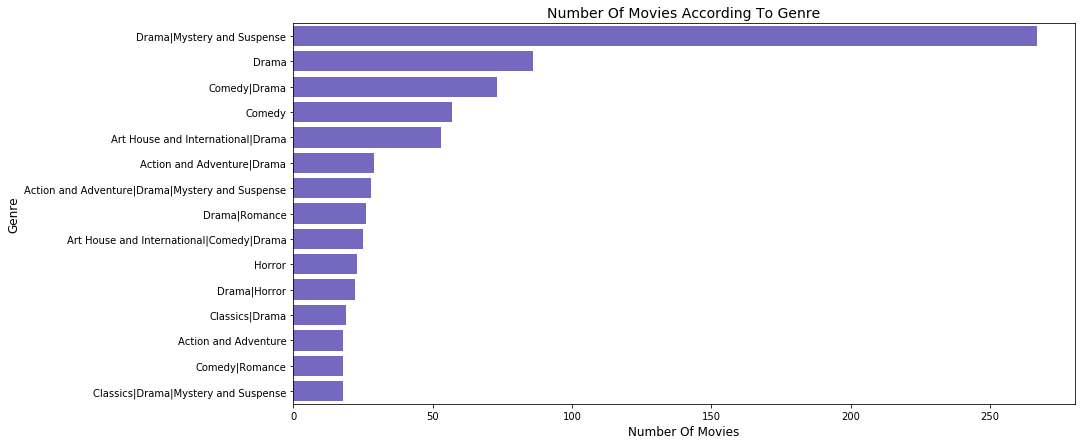

In [11]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=top_15_genres.index, x= top_15_genres,color='slateblue')
plt.xlabel('Number Of Movies',fontsize=12)
plt.ylabel('Genre',fontsize=12)
plt.title('Number Of Movies According To Genre',fontsize=14)
plt.savefig('Genre Count.png')

Drama with mystery and
suspense, comedy, action and
adventure are the leading
produced genres .
Let’s look if these genres are
profitable before we make a conclusion.

## (ANALYSIS 2:checking if the most produced genres are the most profitable genres)


In [13]:
movies_info_df['profit']=(
                       movies_info_df['worldwide_gross_y']
                       +movies_info_df['domestic_gross_y'])-movies_info_df['production_budget']

In [14]:
profit_df=movies_info_df.groupby('genre',as_index=False)[
                   ['production_budget','worldwide_gross_y','profit']].mean().sort_values(by='production_budget',ascending=False)

In [18]:
top_15_profit_df=profit_df.head(15)
top_15_profit_df = top_15_profit_df.sort_values(by='profit',ascending=False)

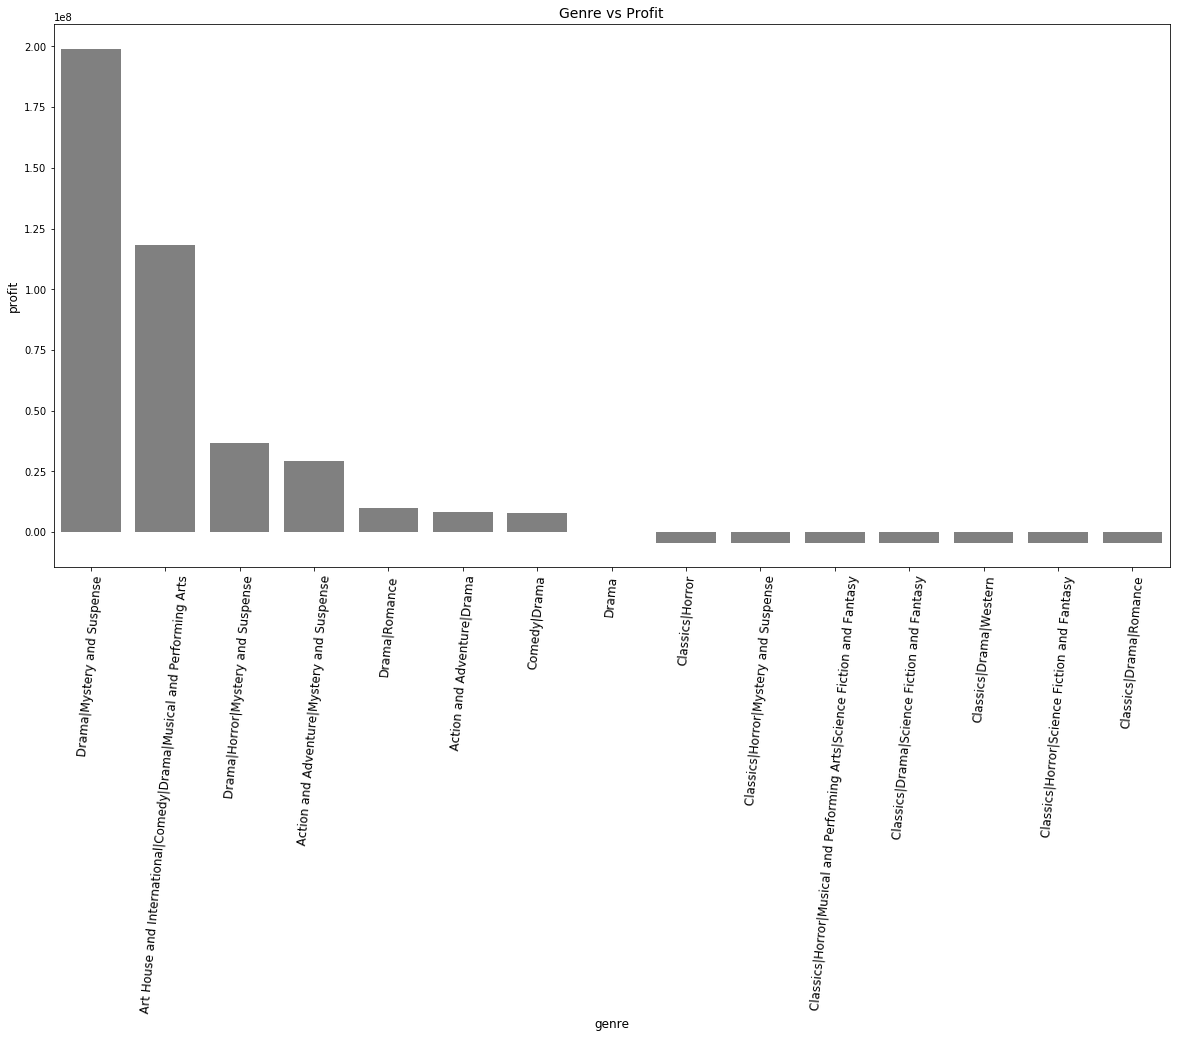

In [19]:
plt.figure(figsize=(20,10))

ax=sns.barplot(x=top_15_profit_df['genre'], y=top_15_profit_df['profit'], color="Grey")
plt.ylabel('profit',fontsize=12)
plt.xlabel('genre',fontsize=12)
plt.title('Genre vs Profit',fontsize=14)
plt.xticks(rotation=85,fontsize=12);
plt.savefig('Genre vs Profit.png')

Drama is indeed the most
profitable genre, or drama related
movies are very profitable in
terms of the mean profit.
Action and comedy follow closely
too.
I recommend Microsoft to look
into producing drama related
movies with comedy, Action,
mystery and suspense because of
the high returns they bring.

## (Checking whether movie rating affect profit and budget)



In [20]:
#grouping by rating and only extracting the columns i need in this analysis
rating_df=movies_info_df.groupby('rating',as_index=False)[['production_budget','worldwide_gross_y']].mean()

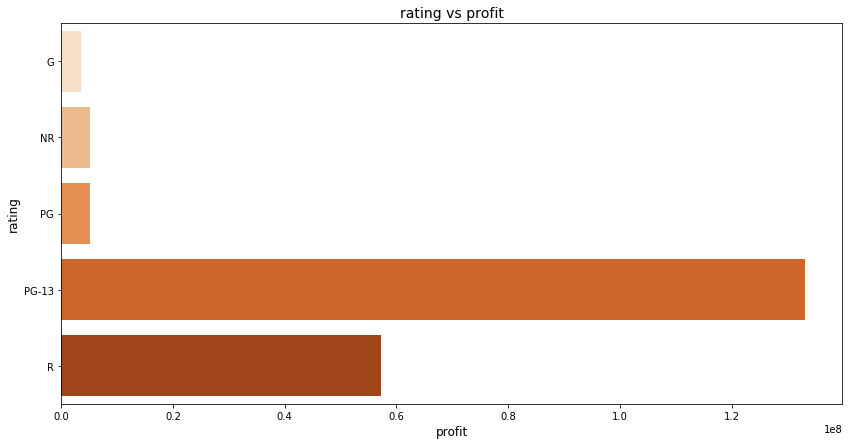

In [21]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=rating_df['rating'], x=rating_df['worldwide_gross_y'],palette='Oranges')
plt.xlabel('profit',fontsize=12)
plt.ylabel('rating',fontsize=12)
plt.title('rating vs profit',fontsize=14)
plt.savefig('rating vs profit.png')


From this graph ,R-rated movies
and PG-13 rated movies make
the most profit as compared to G
and NR movies.
Microsoft should consider the
rating of the movie depending on
the target market of course.
I recommend PG-13 and R rated
movies because they make the most returns.

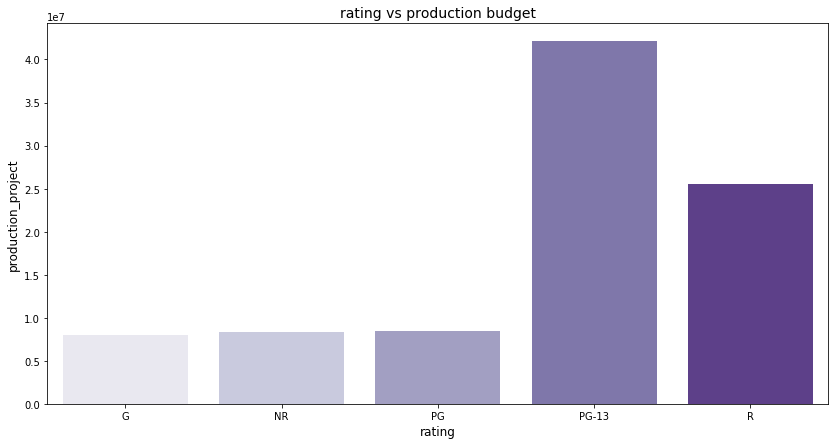

In [22]:
plt.figure(figsize=(14,7))
ax=sns.barplot(x=rating_df['rating'], y=rating_df['production_budget'],palette='Purples')
plt.ylabel('production_project',fontsize=12)
plt.xlabel('rating',fontsize=12)
plt.title('rating vs production budget',fontsize=14)
plt.savefig('movie rating vs production budget.png')

The R-rated and PG-13 rated movies are have a higher budget to produce
but they also have the highest returns.

In [25]:
month_profit=movies_info_df.groupby('month',as_index=False)['profit'].median()

In [27]:
month_profit_df=movies_info_df.groupby('month',as_index=False)['worldwide_gross_y'].mean()
month_profit_df

,month,worldwide_gross_y
0,April,9.921989e+07
1,August,1.367628e+08
2,December,2.436402e+08
3,February,1.684843e+08
4,January,1.442684e+08
5,July,3.225204e+08
6,June,2.219695e+08
7,March,1.642920e+08
8,May,2.122069e+08
9,November,2.311224e+08


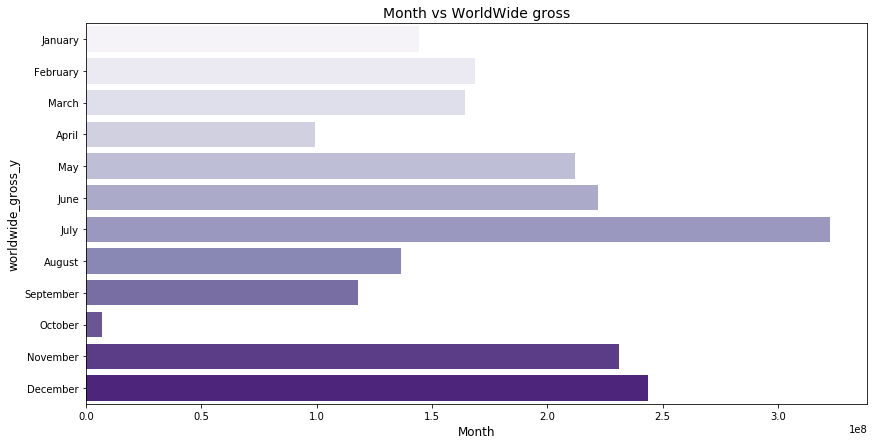

In [28]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=month_profit_df['month'], x=month_profit_df['worldwide_gross_y'],palette='Purples',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])
plt.xlabel('Month',fontsize=12)
plt.ylabel('worldwide_gross_y',fontsize=12)
plt.title('Month vs WorldWide gross',fontsize=14)
plt.savefig('Month vs gross profit.png')

From the graph above, most profits returns are in June , July , November and December .
 I recommend Microsoft to be releasing most of their movies in the Month of June, July, November,
December has the most profit makes the most returns

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [30]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
